In [ ]:
! pip install scikit-activeml

# Imports

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import load_wine, load_iris
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import f1_score, confusion_matrix
from skactiveml.classifier import SklearnClassifier, ParzenWindowClassifier
from skactiveml.utils import MISSING_LABEL, labeled_indices, unlabeled_indices
from skactiveml.pool import QueryByCommittee, RandomSampling, UncertaintySampling

# **A-Approach 1**

# IRIS Dataset

In [2]:
iris = load_iris()
X, y_true = iris.data, iris.target

y_true = y_true % 2
X_lbld, X_unlbld, y_lbld, y_unlbld = train_test_split(X, y_true, test_size=0.8, stratify=y_true, random_state=42)
y_nan = np.full(shape=y_lbld.shape, fill_value=MISSING_LABEL)

# Number of repeated classifiers in the learning cycle
n_classifiers = 3 

# Using Label Propagation Classifier

In [3]:
clf = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)

# 1-QBC x KL

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.3673469387755102
F1 Score after active learning (Cycle 1): 0.20980289342843025
F1 Score after active learning (Cycle 2): 0.10490144671421513
F1 Score after active learning (Cycle 3): 0.1754898533650323
F1 Score after active learning (Cycle 4): 0.292751269805195
F1 Score after active learning (Cycle 5): 0.3877747863359594
F1 Score after active learning (Cycle 6): 0.47080331293762373
F1 Score after active learning (Cycle 7): 0.5298745697078928
F1 Score after active learning (Cycle 8): 0.5760005585160356
F1 Score after active learning (Cycle 9): 0.6143396777452481
F1 Score after active learning (Cycle 10): 0.6450109731286179
F1 Score after active learning (Cycle 11): 0.670742592237102
F1 Score after active learning (Cycle 12): 0.6927694541394214
F1 Score after active learning (Cycle 13): 0.7114075680567686
F1 Score after active learning (Cycle 14): 0.7273830942716377
F1 Score after active learning (Cycle 15): 0.7412285503245241
F1 Score after active lear

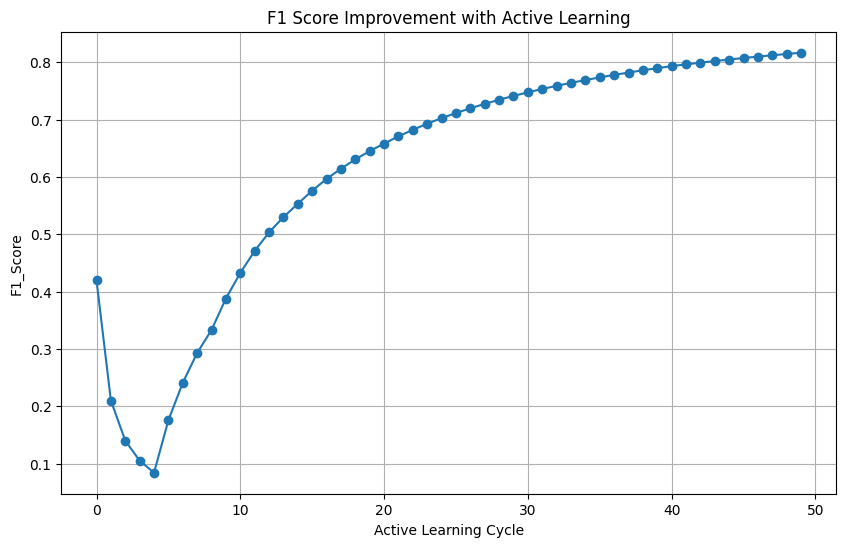

Testing F1Score:0.8186929416905733



In [4]:
clf1 = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)
qs = QueryByCommittee(method='KL_divergence',random_state=42)
classifier_list=[clf1 for _ in range(n_classifiers)]

clf1.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf1.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values1=[]
f1scores_initial1=[]

for c in range(n_cycles):
    
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred_initial = clff.predict(X_unlbld)
        f1score_initial = f1_score(y_unlbld, y_pred_initial)
        f1scores_initial1.append(f1score_initial)
        
    f1Score=np.mean(f1scores_initial1)
    f1score_values1.append(f1Score)
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, ensemble=classifier_list)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]

    
    # Evaluate the classifier
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred = clff.predict(X_unlbld)
        F1_Score = f1_score(y_unlbld, y_pred)
        f1scores_initial1.append(F1_Score)
        
    f1Score=np.mean(f1scores_initial1)
    f1score_values1.append(f1Score)
    
    print(f"F1 Score after active learning (Cycle {c+1}):", f1Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values1)), f1score_values1, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning')
plt.grid(True)
plt.show()


for clff in classifier_list:
    y_pred_test = clff.predict(X_unlbld)
    f1score_active1 = f1_score(y_unlbld, y_pred_test)
    f1scores_initial1.append(f1score_active1)

f1Score=np.mean(f1scores_initial1)
f1score_values1.append(f1Score)


print(f"Testing F1Score:{f1Score}\n")

# 2-QBC x VE

F1 Score before active learning: 0.3653846153846154
F1 Score after active learning (Cycle 1): 0.8186929416905733
F1 Score after active learning (Cycle 2): 0.8186929416905733
F1 Score after active learning (Cycle 3): 0.8186929416905733
F1 Score after active learning (Cycle 4): 0.8186929416905733


/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score after active learning (Cycle 5): 0.8186929416905733
F1 Score after active learning (Cycle 6): 0.8186929416905733
F1 Score after active learning (Cycle 7): 0.8186929416905733
F1 Score after active learning (Cycle 8): 0.8186929416905733
F1 Score after active learning (Cycle 9): 0.8186929416905733
F1 Score after active learning (Cycle 10): 0.8186929416905733
F1 Score after active learning (Cycle 11): 0.8186929416905733
F1 Score after active learning (Cycle 12): 0.8186929416905733
F1 Score after active learning (Cycle 13): 0.8186929416905733
F1 Score after active learning (Cycle 14): 0.8186929416905733
F1 Score after active learning (Cycle 15): 0.8186929416905733
F1 Score after active learning (Cycle 16): 0.8186929416905733
F1 Score after active learning (Cycle 17): 0.8186929416905733
F1 Score after active learning (Cycle 18): 0.8186929416905733
F1 Score after active learning (Cycle 19): 0.8186929416905733
F1 Score after active learning (Cycle 20): 0.8186929416905733
F1 Score afte

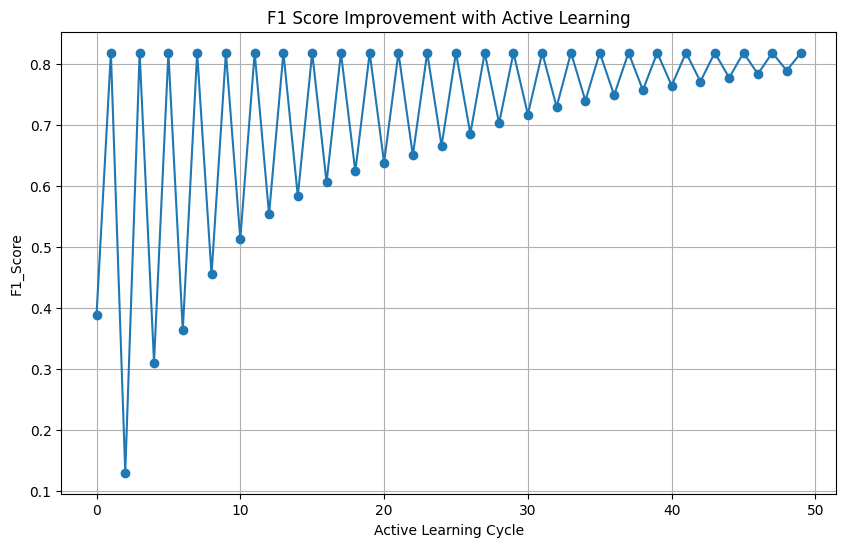

Testing F1Score:0.7946880998925211



In [6]:
clf2 = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)
qs = QueryByCommittee(method='vote_entropy',random_state=42)
classifier_list=[clf2 for _ in range(n_classifiers)]

clf2.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf2.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values2=[]
f1scores_initial2=[]

for c in range(n_cycles):
    
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred_initial = clff.predict(X_unlbld)
        f1score_initial = f1_score(y_unlbld, y_pred_initial)
        f1scores_initial2.append(f1score_initial)
        
    f1Score=np.mean(f1scores_initial2)
    f1score_values2.append(f1Score)
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, ensemble=classifier_list)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]

    
    # Evaluate the classifier
    for clff in classifier_list:
        clff.fit(X_lbld, y_nan)

        y_pred = clff.predict(X_unlbld)
        F1_Score = f1_score(y_unlbld, y_pred)
        f1scores_initial2.append(F1_Score)
        
    f1Score=np.mean(f1scores_initial1)
    f1score_values2.append(f1Score)
    
    print(f"F1 Score after active learning (Cycle {c+1}):", f1Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values2)), f1score_values2, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning')
plt.grid(True)
plt.show()



for clff in classifier_list:
    y_pred_test = clff.predict(X_unlbld)
    f1score_active1 = f1_score(y_unlbld, y_pred_test)
    f1scores_initial2.append(f1score_active1)

f1Score=np.mean(f1scores_initial2)
f1score_values1.append(f1Score)


print(f"Testing F1Score:{f1Score}\n")

# 3-USxE

F1 Score before active learning: 0.4600000000000001
F1 Score after active learning (Cycle 1): 0.0
F1 Score after active learning (Cycle 2): 0.0
F1 Score after active learning (Cycle 3): 0.71875
F1 Score after active learning (Cycle 4): 0.7272727272727274
F1 Score after active learning (Cycle 5): 0.8648648648648648
F1 Score after active learning (Cycle 6): 0.9367088607594937
F1 Score after active learning (Cycle 7): 0.9230769230769231
F1 Score after active learning (Cycle 8): 0.9090909090909091
F1 Score after active learning (Cycle 9): 0.9090909090909091
F1 Score after active learning (Cycle 10): 0.9090909090909091
F1 Score after active learning (Cycle 11): 0.9230769230769231
F1 Score after active learning (Cycle 12): 0.9230769230769231


/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score after active learning (Cycle 13): 0.9230769230769231
F1 Score after active learning (Cycle 14): 0.9230769230769231
F1 Score after active learning (Cycle 15): 0.9230769230769231
F1 Score after active learning (Cycle 16): 0.9230769230769231
F1 Score after active learning (Cycle 17): 0.9230769230769231
F1 Score after active learning (Cycle 18): 0.9230769230769231
F1 Score after active learning (Cycle 19): 0.9230769230769231
F1 Score after active learning (Cycle 20): 0.9230769230769231
F1 Score after active learning (Cycle 21): 0.9230769230769231
F1 Score after active learning (Cycle 22): 0.9230769230769231
F1 Score after active learning (Cycle 23): 0.9230769230769231
F1 Score after active learning (Cycle 24): 0.9230769230769231
F1 Score after active learning (Cycle 25): 0.9230769230769231


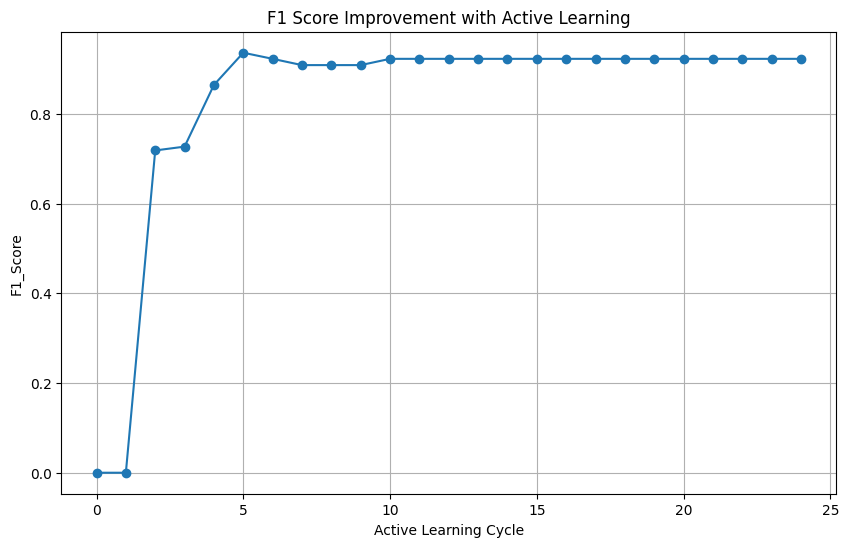

Testing F1 Score: 0.9230769230769231


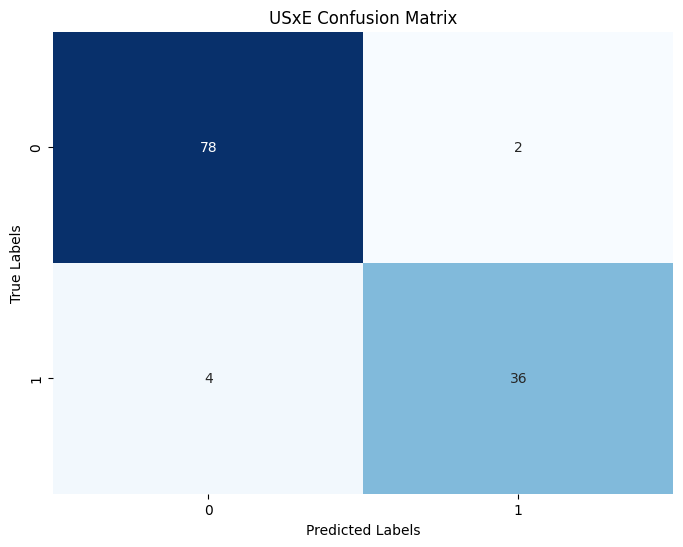

In [8]:
clf3 = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='entropy',random_state=42)

clf3.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf3.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values3=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf3.fit(X_lbld, y_nan)
    

     # Evaluate the classifier
    y_pred = clf3.predict(X_unlbld)
    F1_Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1_Score)
    f1score_values3.append(F1_Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values3)), f1score_values3, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning')
plt.grid(True)
plt.show()


y_pred_test = clf3.predict(X_unlbld)
f1score_active1 = f1_score(y_unlbld, y_pred_test)
print("Testing F1 Score:", f1score_active1)

confusionMatrix=confusion_matrix(y_unlbld,y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxE Confusion Matrix') 
plt.show()

# 4-USxMS

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.42857142857142855
F1 Score after active learning (Cycle 1): 0.5
F1 Score after active learning (Cycle 2): 0.5
F1 Score after active learning (Cycle 3): 0.6451612903225806
F1 Score after active learning (Cycle 4): 0.5892857142857143
F1 Score after active learning (Cycle 5): 0.6324786324786325
F1 Score after active learning (Cycle 6): 0.6271186440677966
F1 Score after active learning (Cycle 7): 0.608695652173913
F1 Score after active learning (Cycle 8): 0.608695652173913
F1 Score after active learning (Cycle 9): 0.6206896551724138
F1 Score after active learning (Cycle 10): 0.6206896551724138
F1 Score after active learning (Cycle 11): 0.6206896551724138
F1 Score after active learning (Cycle 12): 0.6206896551724138
F1 Score after active learning (Cycle 13): 0.6206896551724138
F1 Score after active learning (Cycle 14): 0.6206896551724138
F1 Score after active learning (Cycle 15): 0.9230769230769231
F1 Score after active learning (Cycle 16): 0.9230769230769

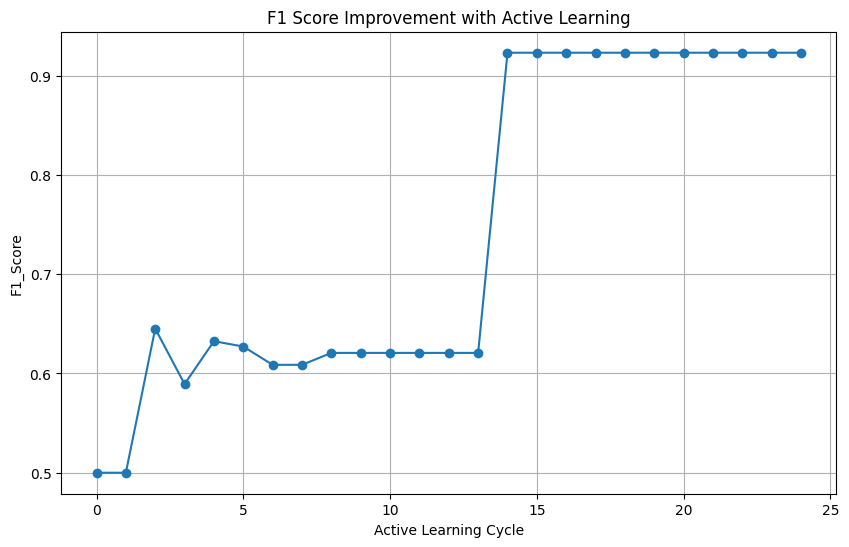

Testing F1 Score: 0.9230769230769231


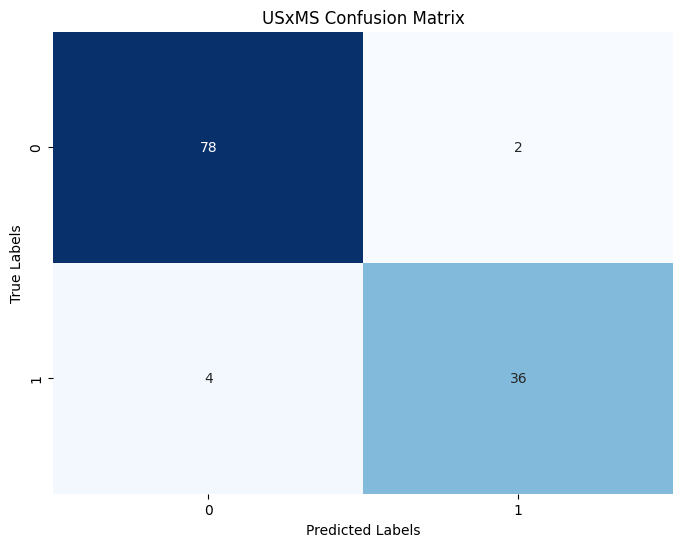

In [10]:
clf4 = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='margin_sampling',random_state=42)

clf4.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf4.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values4=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf4.fit(X_lbld, y_nan)
    

    # Evaluate the classifier
    y_pred = clf4.predict(X_unlbld)
    F1_Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1_Score)
    f1score_values4.append(F1_Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values4)), f1score_values4, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning')
plt.grid(True)
plt.show()


y_pred_test = clf4.predict(X_unlbld)
f1score_active1 = f1_score(y_unlbld, y_pred_test)
print("Testing F1 Score:", f1score_active1)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxMS Confusion Matrix') 
plt.show()

# 5-USxLC

/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:219: UserWarning: Since the 'base_estimator' could not be fitted when calling the `fit` method, the class label distribution`_label_counts=[0, 0]` is used to make the predictions.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/classifier/_wrapper.py:320: UserWarning: The 'base_estimator' could not be fitted because of 'There is no labeled data.'. Therefore, the class labels of the samples are counted and will be used to make predictions. The class label distribution is `_label_counts=[0, 0]`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/skactiveml/

F1 Score before active learning: 0.3789473684210526
F1 Score after active learning (Cycle 1): 0.9230769230769231
F1 Score after active learning (Cycle 2): 0.9230769230769231
F1 Score after active learning (Cycle 3): 0.9230769230769231
F1 Score after active learning (Cycle 4): 0.9230769230769231
F1 Score after active learning (Cycle 5): 0.9230769230769231
F1 Score after active learning (Cycle 6): 0.9230769230769231
F1 Score after active learning (Cycle 7): 0.9230769230769231
F1 Score after active learning (Cycle 8): 0.9230769230769231
F1 Score after active learning (Cycle 9): 0.9230769230769231
F1 Score after active learning (Cycle 10): 0.9230769230769231
F1 Score after active learning (Cycle 11): 0.9230769230769231
F1 Score after active learning (Cycle 12): 0.9230769230769231
F1 Score after active learning (Cycle 13): 0.9230769230769231
F1 Score after active learning (Cycle 14): 0.9230769230769231
F1 Score after active learning (Cycle 15): 0.9230769230769231
F1 Score after active learn

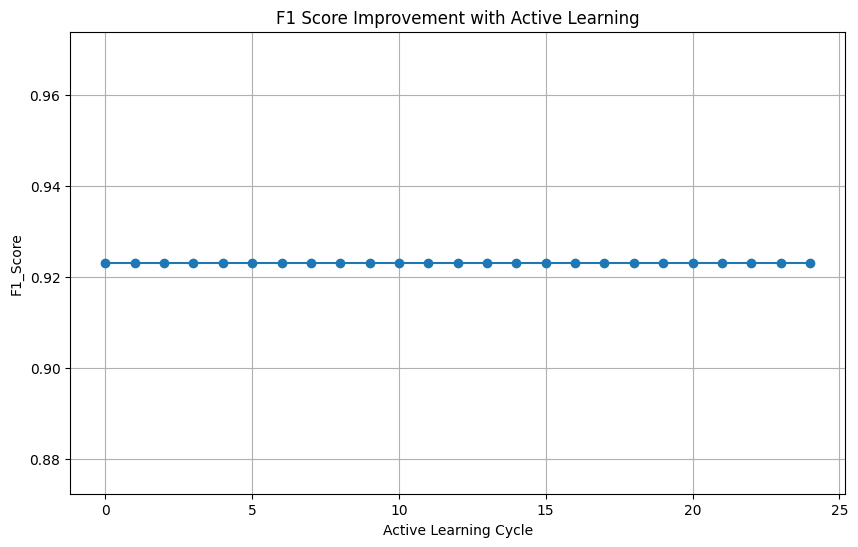

Testing F1 Score: 0.9230769230769231


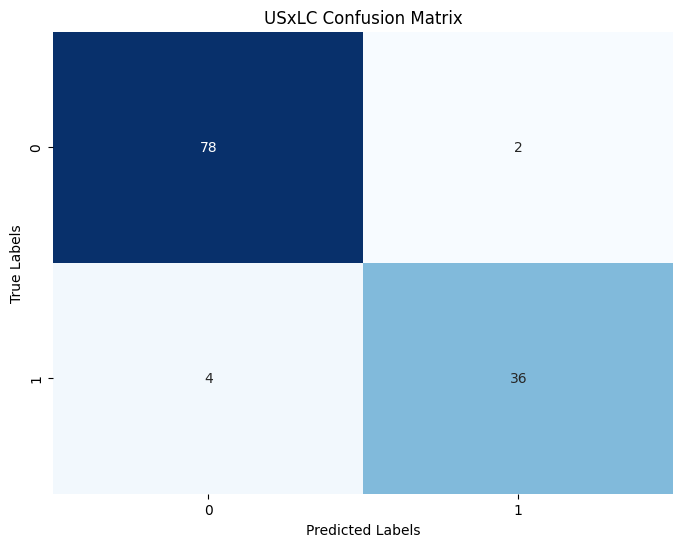

In [12]:
clf5 = SklearnClassifier(LabelPropagation(),classes=np.unique(y_true),random_state=42)
qs = UncertaintySampling(method='least_confident',random_state=42)

clf5.fit(X_lbld, y_nan)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf5.predict(X_unlbld)
f1score_initial = f1_score(y_unlbld, y_pred_initial)
print("F1 Score before active learning:", f1score_initial)

# Active learning loop
n_cycles = 25
f1score_values5=[]

for c in range(n_cycles):
    
    # Get labeled instances
    X_tobelabeled=X_lbld[labeled_indices(y_nan)]
    
    # Query the next instance(s)
    query_idx = qs.query(X=X_lbld, y=y_nan, clf=clf3)
    
    # Label the queried instances
    y_nan[query_idx] = y_lbld[query_idx]


    clf5.fit(X_lbld, y_nan)
    

    # Evaluate the classifier
    y_pred = clf4.predict(X_unlbld)
    F1_Score = f1_score(y_unlbld, y_pred)
    print(f"F1 Score after active learning (Cycle {c+1}):", F1_Score)
    f1score_values5.append(F1_Score)

plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values5)), f1score_values5, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning')
plt.grid(True)
plt.show()


y_pred_test = clf4.predict(X_unlbld)
f1score_active1 = f1_score(y_unlbld, y_pred_test)
print("Testing F1 Score:", f1score_active1)

confusionMatrix=confusion_matrix(y_unlbld,y_pred_test)

plt.figure(figsize=(8, 6)) 
sns.heatmap(confusionMatrix,annot=True, fmt="d", cmap="Blues", cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('USxLC Confusion Matrix') 
plt.show()

# Putting all plots together for iris dataset in approach 1

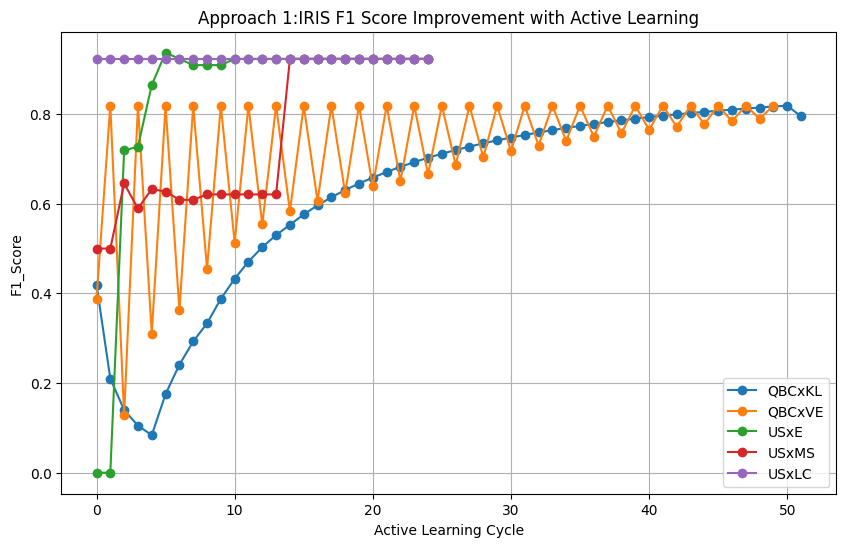

In [13]:
# Plotting F1_Score over cycles for all four scenarios
plt.figure(figsize=(10, 6))

# Plotting F1_Score values for scenario 1
plt.plot(range(len(f1score_values1)), f1score_values1, marker='o', label='QBCxKL')

# Plotting F1_Score values for scenario 2
plt.plot(range(len(f1score_values2)), f1score_values2, marker='o', label='QBCxVE')

# Plotting F1_Score values for scenario 3
plt.plot(range(len(f1score_values3)), f1score_values3, marker='o', label='USxE')

# Plotting F1_Score values for scenario 4
plt.plot(range(len(f1score_values4)), f1score_values4, marker='o', label='USxMS')

# Plotting F1_Score values for scenario 5
plt.plot(range(len(f1score_values5)), f1score_values5, marker='o', label='USxLC')

plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('Approach 1: IRIS F1 Score Improvement with Active Learning')
plt.grid(True)
plt.legend()
plt.show()


# -------------------------------------------------------------------------------------------------------------

# **B-Approach 2**

# Wine Dataset

# 1-QueryByCommittee

In [14]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a Parzen Window classifier
clf = SklearnClassifier(BaggingClassifier(ParzenWindowClassifier()), classes=[0, 1, 2], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)
# print (y_labeled.shape)
# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial, average='weighted')
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score_active1 = f1_score(y_unlabeled, y_pred_test1, average='weighted')
print("Testing F1 Score before:", f1score_active1)

F1 Score before active learning: 0.10974842767295596
Testing F1 Score before: 0.23333894142554693


F1 Score after active learning cycle 0: 0.20476382134272453
F1 Score after active learning cycle 1: 0.23300869715310701
F1 Score after active learning cycle 2: 0.3028671756174988
F1 Score after active learning cycle 3: 0.40169278480840703
F1 Score after active learning cycle 4: 0.46058886678062694
F1 Score after active learning cycle 5: 0.47534946103302644
F1 Score after active learning cycle 6: 0.5843990392963513
F1 Score after active learning cycle 7: 0.6040853909988081
F1 Score after active learning cycle 8: 0.6217508245071868
F1 Score after active learning cycle 9: 0.6935938198922962
F1 Score after active learning cycle 10: 0.6914531473300196
F1 Score after active learning cycle 11: 0.7178199322124812


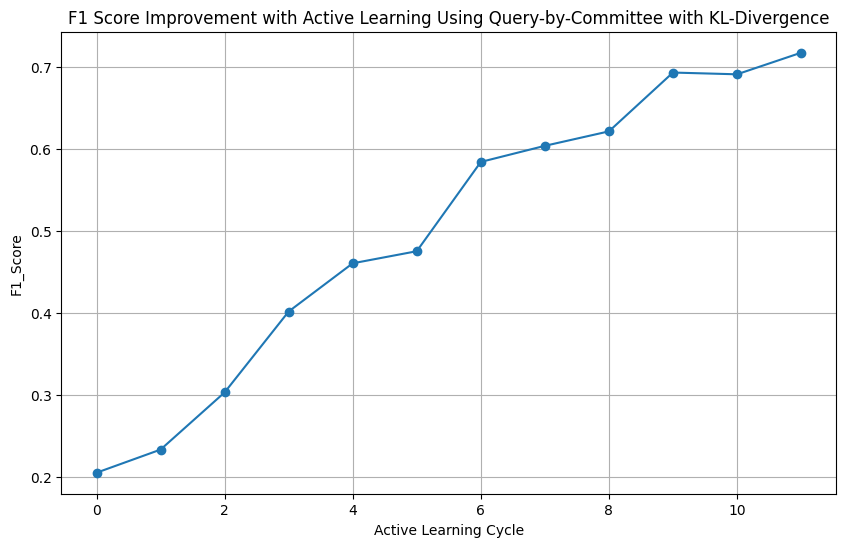

Testing F1 Score: 0.7082126770373811


In [15]:
# Active learning loop
batch_size = 10
n_cycles = int((X_unlabeled.shape[0]/batch_size))
qs = QueryByCommittee(method='KL_divergence', random_state=42)
f1score_values_of_QueryByCommittee = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new, y_new)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, ensemble=clf, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active , average='weighted')
    f1score_values_of_QueryByCommittee.append(f1score_active)  # Store F1_Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1_Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_QueryByCommittee)), f1score_values_of_QueryByCommittee, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning Using Query-by-Committee with KL-Divergence')
plt.grid(True)
plt.show()

# print("F1_Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score_active1 = f1_score(y_unlabeled, y_pred_test ,average='weighted')
print("Testing F1 Score:", f1score_active1)

# 2-Random Sampling

In [16]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a Parzen Window classifier
clf = ParzenWindowClassifier(classes=[0, 1, 2], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)
# print (y_labeled.shape)
# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial, average='weighted')
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score_active1 = f1_score(y_unlabeled, y_pred_test1, average='weighted')
print("Testing F1 Score before:", f1score_active1)

F1 Score before active learning: 0.22432028594866987
Testing F1 Score before: 0.35486920667298033


F1 Score after active learning cycle 0: 0.3635930508909544
F1 Score after active learning cycle 1: 0.5488114735493379
F1 Score after active learning cycle 2: 0.5443655831738995
F1 Score after active learning cycle 3: 0.545496274279895
F1 Score after active learning cycle 4: 0.5503373558401387
F1 Score after active learning cycle 5: 0.6200043587756683
F1 Score after active learning cycle 6: 0.629889172640978
F1 Score after active learning cycle 7: 0.6443397726036795
F1 Score after active learning cycle 8: 0.6977111943404078
F1 Score after active learning cycle 9: 0.7025167985181203
F1 Score after active learning cycle 10: 0.7217592744544813
F1 Score after active learning cycle 11: 0.7314387268091954


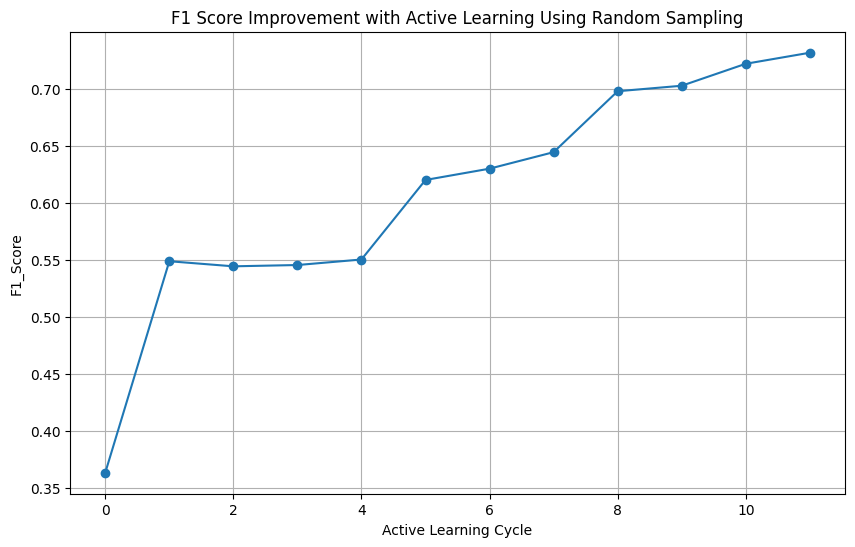

Testing F1 Score: 0.7159342648252203


In [17]:
# Active learning loop
batch_size = 10
n_cycles = int((X_unlabeled.shape[0]/batch_size))
qs = RandomSampling(random_state=42)
f1score_values_of_RandomSampling = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new.shape)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active, average='weighted')
    f1score_values_of_RandomSampling.append(f1score_active)  # Store F1_Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1_Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_RandomSampling)), f1score_values_of_RandomSampling, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning Using Random Sampling')
plt.grid(True)
plt.show()

# print("F1_Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score_active1 = f1_score(y_unlabeled, y_pred_test, average='weighted')
print("Testing F1 Score:", f1score_active1)

# 3-Margin Sampling

In [18]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a Parzen Window classifier
clf = ParzenWindowClassifier(classes=[0, 1, 2], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)
# print (y_labeled.shape)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial, average='weighted')
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score_active1 = f1_score(y_unlabeled, y_pred_test1,average='weighted')
print("Testing F1 Score before:", f1score_active1)

F1 Score before active learning: 0.23685983827493262
Testing F1 Score before: 0.3581189658048374


F1 Score after active learning cycle 0: 0.35052928612318657
F1 Score after active learning cycle 1: 0.431621280462902
F1 Score after active learning cycle 2: 0.4865637747592414
F1 Score after active learning cycle 3: 0.4996139693803799
F1 Score after active learning cycle 4: 0.5448293586663568
F1 Score after active learning cycle 5: 0.5839330327625728
F1 Score after active learning cycle 6: 0.6281213181132586
F1 Score after active learning cycle 7: 0.66198897592938
F1 Score after active learning cycle 8: 0.6813427659869608
F1 Score after active learning cycle 9: 0.6764147731056184
F1 Score after active learning cycle 10: 0.7005133375805365
F1 Score after active learning cycle 11: 0.7197436079778562


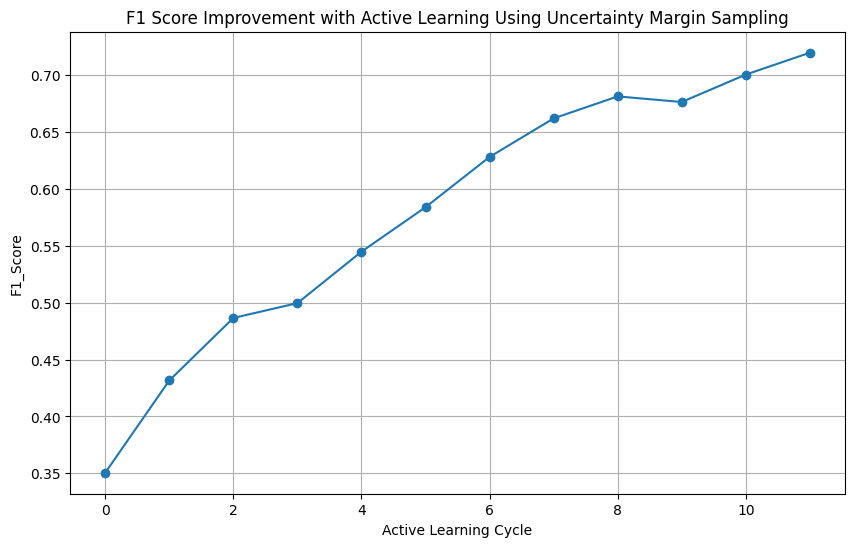

Testing F1 Score: 0.6857073891625617


In [19]:
# Active learning loop
batch_size = 10
n_cycles = int((X_unlabeled.shape[0]/batch_size))
qs = UncertaintySampling(method='margin_sampling', random_state=42)
f1score_values_of_margin_sampling = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new.shape)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, clf=clf, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active, average='weighted')
    f1score_values_of_margin_sampling.append(f1score_active)  # Store F1_Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1_Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_margin_sampling)), f1score_values_of_margin_sampling, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning Using Uncertainty Margin Sampling')
plt.grid(True)
plt.show()

# print("F1_Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score_active1 = f1_score(y_unlabeled, y_pred_test, average='weighted')
print("Testing F1 Score:", f1score_active1)

# 4-Entropy Sampling

In [20]:
# Load the wine dataset
wine = load_wine()
X, y = wine.data, wine.target
X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(X, y, test_size=0.7, random_state=42)

y_nan = np.full(shape=y_unlabeled.shape, fill_value=MISSING_LABEL)

y_combined = np.concatenate((y_labeled, y_nan))

# Create a Parzen Window classifier
clf = ParzenWindowClassifier(classes=[0, 1, 2], random_state=42)

# Train the classifier on the labeled data
clf.fit(X, y_combined)
# print (y_labeled.shape)

# Evaluate the classifier on the initial labeled data
y_pred_initial = clf.predict(X_labeled)
f1score_initial = f1_score(y_labeled, y_pred_initial, average='weighted')
print("F1 Score before active learning:", f1score_initial)

y_pred_test1 = clf.predict(X_unlabeled)
# print(y_pred_test)
f1score_active1 = f1_score(y_unlabeled, y_pred_test1, average='weighted')
print("Testing F1 Score before:", f1score_active1)

F1 Score before active learning: 0.2828484479610468
Testing F1 Score before: 0.37830741626794256


F1 Score after active learning cycle 0: 0.33592707221708973
F1 Score after active learning cycle 1: 0.5027636988986209
F1 Score after active learning cycle 2: 0.5490306520017593
F1 Score after active learning cycle 3: 0.5831462781565021
F1 Score after active learning cycle 4: 0.5861124564122433
F1 Score after active learning cycle 5: 0.6184626271147865
F1 Score after active learning cycle 6: 0.6375591802517384
F1 Score after active learning cycle 7: 0.6570973911086745
F1 Score after active learning cycle 8: 0.6717015916484324
F1 Score after active learning cycle 9: 0.7067835115400869
F1 Score after active learning cycle 10: 0.7407967083528881
F1 Score after active learning cycle 11: 0.7505984370682204


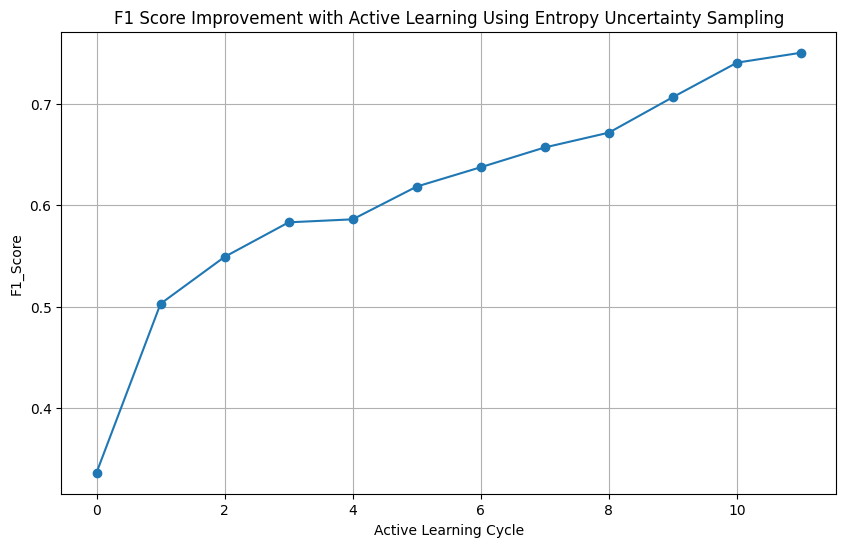

Testing F1 Score: 0.7291249272776635


In [21]:
# Active learning loop
batch_size = 10
n_cycles = int((X_unlabeled.shape[0]/batch_size))
qs = UncertaintySampling(method='entropy', random_state=42)
f1score_values_of_Entropy = []
for c in range(n_cycles):
    # Get labeled instances
    labeled_idx = unlabeled_indices(y_combined)
    # print(labeled_idx)
    X_new = X[labeled_idx]
    y_new = y_combined[labeled_idx]
    # print(X_new.shape)
    
    # Fit the classifier on the updated labeled data
    clf.fit(X, y_combined)

    # Query the next instance/s.
    query_idx = qs.query(X=X, y=y_combined, clf=clf, batch_size=batch_size)

    # Label the queried instances.
    y_combined[query_idx] = y[query_idx]
    # print (y_combined)
    y_pred_active = clf.predict(X)
    f1score_active = f1_score(y, y_pred_active, average='weighted')
    f1score_values_of_Entropy.append(f1score_active)  # Store F1_Score for visualization

    print(f"F1 Score after active learning cycle {c}: {f1score_active}")

# Plotting F1_Score over cycles
plt.figure(figsize=(10, 6))
plt.plot(range(len(f1score_values_of_Entropy)), f1score_values_of_Entropy, marker='o')
plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('F1 Score Improvement with Active Learning Using Entropy Uncertainty Sampling')
plt.grid(True)
plt.show()

# print("F1_Score after active learning:", f1score_active)

# Testing the classifier
y_pred_test = clf.predict(X_unlabeled)
f1score_active1 = f1_score(y_unlabeled, y_pred_test, average='weighted')
print("Testing F1 Score:", f1score_active1)

# Putting all plots together for wine dataset in approach 2

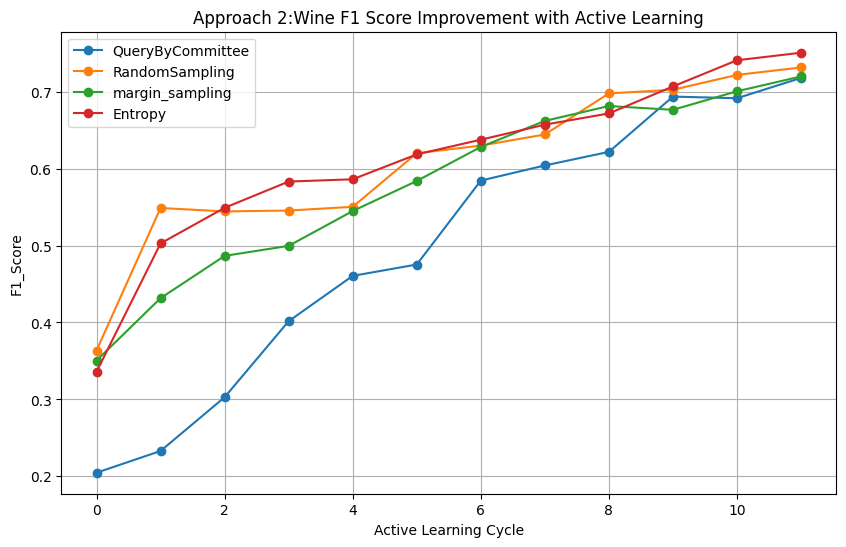

In [22]:
# Plotting F1_Score over cycles for all four scenarios
plt.figure(figsize=(10, 6))

# Plotting F1_Score values for scenario 1
plt.plot(range(len(f1score_values_of_QueryByCommittee)), f1score_values_of_QueryByCommittee, marker='o', label='QueryByCommittee')

# Plotting F1_Score values for scenario 2
plt.plot(range(len(f1score_values_of_RandomSampling)), f1score_values_of_RandomSampling, marker='o', label='RandomSampling')

# Plotting F1_Score values for scenario 3
plt.plot(range(len(f1score_values_of_margin_sampling)), f1score_values_of_margin_sampling, marker='o', label='margin_sampling')

# Plotting F1_Score values for scenario 4
plt.plot(range(len(f1score_values_of_Entropy)), f1score_values_of_Entropy, marker='o', label='Entropy')

plt.xlabel('Active Learning Cycle')
plt.ylabel('F1_Score')
plt.title('Approach 2:Wine F1 Score Improvement with Active Learning')
plt.grid(True)
plt.legend()  # Show the legend with labels for each scenario
plt.show()
